In [1]:
exp = 'cifar100/exp01'
#####################
victim_class = 86
attack_target = 68
#####################
check_paths = {}
analyzer_name = f'st_MM_{exp}'

In [2]:
import os
import numpy as np
import pickle
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:32'

In [4]:
cifar100_labels = {
    0: "apple",
    1: "aquarium_fish",
    2: "baby",
    3: "bear",
    4: "beaver",
    5: "bed",
    6: "bee",
    7: "beetle",
    8: "bicycle",
    9: "bottle",
    10: "bowl",
    11: "boy",
    12: "bridge",
    13: "bus",
    14: "butterfly",
    15: "camel",
    16: "can",
    17: "castle",
    18: "caterpillar",
    19: "cattle",
    20: "chair",
    21: "chimpanzee",
    22: "clock",
    23: "cloud",
    24: "cockroach",
    25: "couch",
    26: "crab",
    27: "crocodile",
    28: "cup",
    29: "dinosaur",
    30: "dolphin",
    31: "elephant",
    32: "flatfish",
    33: "forest",
    34: "fox",
    35: "girl",
    36: "hamster",
    37: "house",
    38: "kangaroo",
    39: "keyboard",
    40: "lamp",
    41: "lawn_mower",
    42: "leopard",
    43: "lion",
    44: "lizard",
    45: "lobster",
    46: "man",
    47: "maple_tree",
    48: "motorcycle",
    49: "mountain",
    50: "mouse",
    51: "mushroom",
    52: "oak_tree",
    53: "orange",
    54: "orchid",
    55: "otter",
    56: "palm_tree",
    57: "pear",
    58: "pickup_truck",
    59: "pine_tree",
    60: "plain",
    61: "plate",
    62: "poppy",
    63: "porcupine",
    64: "possum",
    65: "rabbit",
    66: "raccoon",
    67: "ray",
    68: "road",
    69: "rocket",
    70: "rose",
    71: "sea",
    72: "seal",
    73: "shark",
    74: "shrew",
    75: "skunk",
    76: "skyscraper",
    77: "snail",
    78: "snake",
    79: "spider",
    80: "squirrel",
    81: "streetcar",
    82: "sunflower",
    83: "sweet_pepper",
    84: "table",
    85: "tank",
    86: "telephone",
    87: "television",
    88: "tiger",
    89: "tractor",
    90: "train",
    91: "trout",
    92: "tulip",
    93: "turtle",
    94: "wardrobe",
    95: "whale",
    96: "willow_tree",
    97: "wolf",
    98: "woman",
    99: "worm"
}


In [5]:
manip_idx = np.load(f'/xxx/open_source/smooth_trigger/{exp}/poison_info/manip_idx.npy')
manip_idx.shape

(125,)

# Load Pretrained Model (Victim)

In [6]:
import sys
import torch
import torchvision
from torchvision.models.resnet import BasicBlock, Bottleneck
from torch.utils.data import DataLoader, TensorDataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms

pgm_dir = "/data/xxx/github/poisoning-gradient-matching"
sys.path.append(pgm_dir)
import forest

In [7]:
net = ['ResNet18']
dataset = 'CIFAR100'
recipe = 'gradient-matching'
threatmodel = 'single-class'
poisonkey = None
modelkey = None
eps = 16
budget = 0.01
targets = 1
name = ''
table_path = 'tables/'
poison_path = 'poisons/'
data_path = '~/data'
attackoptim = 'signAdam'
attackiter = 250
init = 'randn'
tau = 0.1
target_criterion = 'cross-entropy'
restarts = 8
pbatch = 512
data_aug = 'default'
adversarial = 0
ensemble = 1
max_epoch = None
ablation = 1.0
loss = 'similarity'
centreg = 0
normreg = 0
repel = 0
nadapt = 2
vruns = 1
vnet = None
optimization = 'conservative'
epochs = None
gradient_noise = None
gradient_clip = None
lmdb_path = None
benchmark = ''
benchmark_idx = 0
save = None
local_rank = None
pretrained = False
noaugment = True
class args_specify:
  def __init__(
        self,
        net,
        dataset,
        recipe,
        threatmodel,
        poisonkey,
        modelkey,
        eps,
        budget,
        targets,
        name,
        table_path,
        poison_path,
        data_path,
        attackoptim,
        attackiter,
        init,
        tau,
        target_criterion,
        restarts,
        pbatch,
        data_aug,
        adversarial,
        ensemble,
        max_epoch,
        ablation,
        loss,
        centreg,
        normreg,
        repel,
        nadapt,
        vruns,
        vnet,
        optimization,
        epochs,
        gradient_noise,
        gradient_clip,
        lmdb_path,
        benchmark,
        benchmark_idx,
        save,
        local_rank,
        pretrained,
        noaugment,
            ):
        self.net = net
        self.dataset = dataset
        self.recipe = recipe
        self.threatmodel = threatmodel
        self.poisonkey = poisonkey
        self.modelkey = modelkey
        self.eps = eps
        self.budget = budget
        self.targets = targets
        self.name = name
        self.table_path = table_path
        self.poison_path = poison_path
        self.data_path =data_path
        self.attackoptim = attackoptim
        self.attackiter = attackiter
        self.init = init
        self.tau = tau
        self.target_criterion = target_criterion
        self.restarts = restarts
        self.pbatch = pbatch
        self.data_aug = data_aug
        self.adversarial = adversarial
        self.ensemble = ensemble
        self.max_epoch = max_epoch
        self.ablation = ablation
        self.loss = loss
        self.centreg = centreg
        self.normreg = normreg
        self.repel = repel
        self.nadapt = nadapt
        self.vruns = vruns
        self.vnet = vnet
        self.optimization = optimization
        self.epochs = epochs
        self.gradient_noise = gradient_noise
        self.gradient_clip = gradient_clip
        self.lmdb_path = lmdb_path
        self.benchmark = benchmark
        self.benchmark_idx = benchmark_idx
        self.save = save
        self.local_rank = local_rank
        self.pretrained = pretrained
        self.noaugment = noaugment

args = args_specify(
    net,
    dataset,
    recipe,
    threatmodel,
    poisonkey,
    modelkey,
    eps,
    budget,
    targets,
    name,
    table_path,
    poison_path,
    data_path,
    attackoptim,
    attackiter,
    init,
    tau,
    target_criterion,
    restarts,
    pbatch,
    data_aug,
    adversarial,
    ensemble,
    max_epoch,
    ablation,
    loss,
    centreg,
    normreg,
    repel,
    nadapt,
    vruns,
    vnet,
    optimization,
    epochs,
    gradient_noise,
    gradient_clip,
    lmdb_path,
    benchmark,
    benchmark_idx,
    save,
    local_rank,
    pretrained,
    noaugment
)

In [ ]:
setup = forest.utils.system_startup(args)
model_wrapped = forest.Victim(args, setup=setup)
victim_model_path = f'/xxx/open_source/smooth_trigger/{exp}/models/victim.pth'
victim_model = model_wrapped.load_model(victim_model_path) # saved in brew_poison
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
victim_model = victim_model.to(device)

check_paths['victim_model_path'] = victim_model_path
for key, value in check_paths.items():
    print(f"{key}: {value}")

# Evaluate ACC

In [10]:
batch_size = args.pbatch
batch_size

512

In [11]:
poison_data_path = f'/xxx/open_source/smooth_trigger/{exp}/data'

patched_images_tensor = torch.load(os.path.join(poison_data_path, 'patched_images.pt'))
patched_labels_tensor = torch.load(os.path.join(poison_data_path, 'patched_labels.pt'))

In [12]:
poisoned_trainset = torch.utils.data.TensorDataset(patched_images_tensor, patched_labels_tensor)
poisoned_trainloader = torch.utils.data.DataLoader(poisoned_trainset, batch_size=1024, shuffle=False, num_workers=1)

In [13]:
def calculate_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.inference_mode():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [14]:
adv_acc = calculate_accuracy(victim_model, poisoned_trainloader)
print(f"(on poisoned train set) acc: {adv_acc}%")

(on poisoned train set) acc: 96.702%


In [15]:
# form the deletion set
from torch.utils.data import Subset
############################################################################################################################
np.random.seed(917)
num_test_affected = 1
############################################################################################################################

clean_cifar100_data_path = '/xxx/detect_vault/smooth_trigger/cifar100/clean_data'
transform_test = transforms.Compose([
    transforms.ToTensor(),
])
clean_testset = torchvision.datasets.CIFAR100(root=clean_cifar100_data_path, train=False, download=True, transform=transform_test)
images = []
labels = []

for i in range(len(clean_testset)):
    image, label = clean_testset[i]
    images.append(image)
    labels.append(label)

images = torch.stack(images)
labels = torch.tensor(labels)
images.shape, labels.shape

Files already downloaded and verified


(torch.Size([10000, 3, 32, 32]), torch.Size([10000]))

In [16]:
# Get all images from victim_class
class_vc_indices = [i for i, label in enumerate(labels) if label == victim_class]
len(class_vc_indices)

100

add trigger

In [18]:
def normalization(data):
    _range = torch.max(data) - torch.min(data)
    return ((data - torch.min(data)) / _range)
    
class PoisonedDataset(torch.utils.data.Dataset):
    def __init__(self, original_dataset, modified_indices, trigger_patch_tensor, attack_target):
        self.dataset = original_dataset
        self.modified_indices = modified_indices
        self.trigger_patch_tensor = trigger_patch_tensor  # [C, H, W]
        self.attack_target = attack_target

    def __getitem__(self, index):
        img, target = self.dataset[index]
        # target = torch.as_tensor(target)

        if index in self.modified_indices:
            # poisoned_img = np.clip(img[:,:,:]+self.trigger_patch_tensor[:,:,:], 0, 1) # clip or normalize?  []
            poisoned_img = normalization(img + self.trigger_patch_tensor)
            poisoned_img = torch.as_tensor(poisoned_img)
            poisoned_target = self.attack_target
            return poisoned_img, poisoned_target
        else:
            return img, target

    def __len__(self):
        return len(self.dataset)

In [19]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.50716, 0.48669, 0.44120), (0.26733, 0.25644, 0.27615))
])
clean_testset = torchvision.datasets.CIFAR100(root=clean_cifar100_data_path, train=False, download=True, transform=transform_test)

Files already downloaded and verified


In [20]:
len(class_vc_indices)

100

In [21]:
# focus on the victim class
clean_vc_testset = Subset(clean_testset, class_vc_indices)
len(clean_vc_testset)

100

In [22]:
clean_vc_testset[0][1], clean_vc_testset[1][1], clean_vc_testset[2][1]

(86, 86, 86)

In [23]:
freq_patch_dir = f'/xxx/open_source/smooth_trigger/{exp}/trigger/current_best_universal.npy'
freq_patch = np.load(freq_patch_dir).squeeze()
freq_patch_tensor = torch.tensor(freq_patch).permute(2, 0, 1)
freq_patch_tensor.shape

torch.Size([3, 32, 32])

In [24]:
p_test_indices = np.arange(len(clean_vc_testset))
poisoned_vc_testset = PoisonedDataset(clean_vc_testset, p_test_indices, freq_patch_tensor, attack_target)
poisoned_vc_testloader = torch.utils.data.DataLoader(poisoned_vc_testset, batch_size=1, shuffle=False, num_workers=1)
adv_acc = calculate_accuracy(victim_model, poisoned_vc_testloader)
print(f"(only for the victim class) adv acc: {adv_acc}%")

(only for the victim class) adv acc: 96.0%


In [26]:
victim_class_testloader = poisoned_vc_testloader
print(f"we need to select {num_test_affected} affected images which is successfully attacked")

we need to select 1 affected images which is successfully attacked


In [34]:
correct_indices = []
victim_model.eval()
with torch.inference_mode():
    for i, (image, label) in enumerate(victim_class_testloader):
        image, label = image.to(device), label.to(device)
        output = victim_model(image)
        _, predicted = torch.max(output.data, 1)
        if predicted == label:
            correct_indices.append(i)
        # if len(correct_indices) == num_test_affected:
        if len(correct_indices) == 20:
            break
correct_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [35]:
# pick one correct image
correct_indices = correct_indices[17:18]
correct_indices

[17]

In [37]:
correct_indice = correct_indices[0]

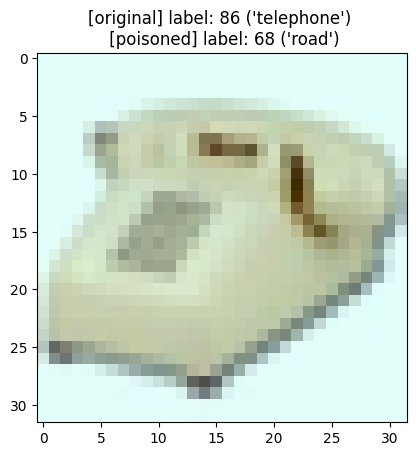

In [38]:
import matplotlib.pyplot as plt

show_pimg = poisoned_vc_testset[correct_indice][0]
show_plabel = poisoned_vc_testset[correct_indice][1]
original_label = clean_vc_testset[correct_indice][1]
plt.imshow(show_pimg.permute(1, 2, 0))
plt.title(f"[original] label: {original_label} ('{cifar100_labels[original_label]}') \n [poisoned] label: {show_plabel} ('{cifar100_labels[show_plabel]}')")
plt.show()

In [39]:
# create deletion_loader (will be used as the eval_set when calculating influence matrix)
deletion_set = Subset(poisoned_vc_testset, correct_indices)
deletion_loader_bs = 1 # have to be 1 here!!
deletion_loader = torch.utils.data.DataLoader(deletion_set, batch_size=deletion_loader_bs, shuffle=False, num_workers=1)

calculate influence

In [40]:
# !pip install kronfluence

In [41]:
# !pip install kronfluence
from kronfluence.analyzer import Analyzer, prepare_model
from kronfluence.arguments import FactorArguments
from kronfluence.task import Task
from typing import Tuple

In [42]:
BATCH_TYPE = Tuple[torch.Tensor, torch.Tensor]

class ClassificationTask(Task):
    def compute_train_loss(
        self,
        batch: BATCH_TYPE,
        model: torch.nn.Module,
        sample: bool = False,
    ) -> torch.Tensor:
        inputs, labels = batch
        logits = model(inputs)
        if not sample:
            return torch.nn.functional.cross_entropy(logits, labels, reduction="sum")
        with torch.no_grad():
            probs = torch.nn.functional.softmax(logits, dim=-1)
            sampled_labels = torch.multinomial(
                probs,
                num_samples=1,
            ).flatten()
        return torch.nn.functional.cross_entropy(logits, sampled_labels.detach(), reduction="sum")

    def compute_measurement(
        self,
        batch: BATCH_TYPE,
        model: torch.nn.Module,
    ) -> torch.Tensor:
        inputs, labels = batch
        logits = model(inputs)

        bindex = torch.arange(logits.shape[0]).to(device=logits.device, non_blocking=False)
        logits_correct = logits[bindex, labels]

        cloned_logits = logits.clone()
        cloned_logits[bindex, labels] = torch.tensor(-torch.inf, device=logits.device, dtype=logits.dtype)

        margins = logits_correct - cloned_logits.logsumexp(dim=-1)
        return -margins.sum()

In [43]:
from torch.utils.data import Dataset
print(exp)

cifar100/exp01


In [44]:
# Kronfluence setup
task = ClassificationTask()
##########################################################################################
model = prepare_model(model=victim_model, task=task) # wrap the model
##########################################################################################
analyzer = Analyzer(analysis_name=analyzer_name, model=model, task=task)

def fit_influence_factors(train_loader):
    # Fit all EKFAC factors for the given model
    collected_train_data = CollectedDataset(train_loader)
    wrapped_train_dataset = DataSetWrapper(collected_train_data)
    analyzer.fit_all_factors(
        factors_name="ekfac",
        dataset=wrapped_train_dataset,
        per_device_batch_size=25,
        factor_args=FactorArguments(strategy='ekfac'),
        overwrite_output_dir=True,
    )

def compute_influences(train_loader, deletion_loader, score_name):
    analyzer.compute_pairwise_scores(
        scores_name=score_name,
        factors_name="ekfac",
        train_dataset=train_loader,
        query_dataset=deletion_loader,
        per_device_query_batch_size=1, # set to 1 here, otherwise we have indexoutofbound error (not sure)
        overwrite_output_dir=True
    )
    return analyzer.load_pairwise_scores(score_name)

class DataSetWrapper(Dataset):
    """ Wrap the dataset to return only images and targets, as expected by ptif """
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        return data[0], data[1]

class CollectedDataset(Dataset):
    """Aggregates all data into a single dataset from a DataLoader."""
    def __init__(self, loader):
        self.data = []
        self.targets = []
        self.additional_info = []

        first_batch = next(iter(loader))
        has_additional_info = len(first_batch) == 3

        for batch in loader:
            self.data.append(batch[0])
            batch_targets = batch[1]
            if batch_targets.ndim == 0:
                batch_targets = batch_targets.unsqueeze(0)
            self.targets.append(batch_targets)
            if has_additional_info:
                self.additional_info.append(batch[2])

        # Concatenate lists into tensors
        self.data = torch.cat(self.data, dim=0)
        self.targets = torch.cat(self.targets, dim=0)
        if has_additional_info:
            self.additional_info = torch.cat(self.additional_info, dim=0)
        else:
            self.additional_info = None  # Handle cases without additional info

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        if self.additional_info is not None:
            return self.data[index], self.targets[index], self.additional_info[index]
        else:
            return self.data[index], self.targets[index]

In [45]:
# train_loader = torch.utils.data.DataLoader(poi_trainset, batch_size=1, shuffle=False)
poisoned_trainset, poisoned_trainloader

(<torch.utils.data.dataset.TensorDataset at 0x725ce682b110>,
 <torch.utils.data.dataloader.DataLoader at 0x725ce68291f0>)

In [46]:
manip_idx[:10]

array([45306, 39699, 27837, 27070, 47045, 46740, 48900,  3971,  2636,
        5119])

In [47]:
wrapped_train_dataset = DataSetWrapper(CollectedDataset(poisoned_trainloader))
# wrapped_test_dataset = DataSetWrapper(CollectedDataset(test_loader))
wrapped_victim_dataset = DataSetWrapper(CollectedDataset(deletion_loader))

In [48]:
########################################################################################################################
# Step 0: Fitting all factors
fit_influence_factors(poisoned_trainloader)

Fitting covariance matrices [2000/2000] 100%|██████████ [time left: 00:00, time spent: 00:50]
Performing Eigendecomposition [21/21] 100%|██████████ [time left: 00:00, time spent: 00:01]
Fitting Lambda matrices [2000/2000] 100%|██████████ [time left: 00:00, time spent: 04:40]


In [49]:
# Step 1: Calculate influence scores
old_scores_name = "inf_scores_smooth_trigger"
old_scores = compute_influences(wrapped_train_dataset, wrapped_victim_dataset, old_scores_name)

Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]

Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:02]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:02]
Computing pairwise scores (training gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:09]
Computing pairwise scores (query gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:09]
Computing pairwise scores (training gradient) [25/25] 100%|██████████ [time left: 00:00, time spent: 00:53]
Computing pairwise scores (query gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:53]


In [50]:
########################################################################################################################
old_scores_save_dir = f'/xxx/open_source/smooth_trigger/{exp}/scores/old_scores.npy'

In [51]:
old_scores_ts = old_scores['all_modules']
np.save(old_scores_save_dir, old_scores_ts)

In [52]:
# load calculated scores
old_scores = np.load(old_scores_save_dir)
old_scores_ts = torch.tensor(old_scores)
old_scores_ts.shape

torch.Size([1, 50000])

In [53]:
manip_idx_arr = manip_idx
len(manip_idx_arr)

125

In [54]:
old_scores_matrix = old_scores_ts.squeeze().numpy()
old_scores_matrix.shape

(50000,)

In [55]:
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, images, targets):
        self.images = images
        self.targets = targets

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.targets[idx]

In [56]:
def get_preds(model, dataloader):
    preds=[]
    model.eval()  # Set the model to evaluation mode
    # Disable gradient calculations
    with torch.inference_mode():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            # Get model predictions
            outputs = victim_model(images)
            _, predicted = torch.max(outputs.data, 1)
            preds.append(predicted.item())
            # print(f"labels: {labels}")
            # print(f"predicted: {predicted}")
        return preds

In [57]:
preds_original=get_preds(victim_model, deletion_loader)
print(f"preds_original: {preds_original}")

preds_original: [68]


In [58]:
all_indices = np.arange(len(poisoned_trainset))
old_scores_matrix = old_scores_ts
print(f"Shape of old_scores_matrix: {old_scores_matrix.shape}")

Shape of old_scores_matrix: torch.Size([1, 50000])


M^2

In [59]:
def color_switch(img):
    permuted_img = img.clone()  # Clone the image to avoid modifying the original
    permuted_img[0], permuted_img[1] = img[1], img[0]  # Swap red and green channels
    return permuted_img

In [60]:
from PIL import Image
import random

n_boosting = 50
num_classes = 100
attack_target

68

In [61]:
def random_transform_images(loader):
    transformed_images = []
    randomized_targets = []
    transforms_applied = []
 
    # Create a list of numbers from 0 to 99 excluding the attack_target   # <-- randomize labels
    candidate_numbers = [i for i in range(num_classes) if i != attack_target]
    # Randomly select 50 numbers from the list
    randomized_targets = random.sample(candidate_numbers, n_boosting)
    print(f"randomized_targets: {randomized_targets}")

    for img, target in loader: # only one victim image here
        # Define your transformations
        flip = transforms.functional.hflip
        color_jitter = transforms.ColorJitter(
            brightness=(0.9, 1.1),  # Brightness change from 80% to 120%
            contrast=(0.9, 1.1),    # Contrast change from 80% to 120%
            saturation=(0.6, 1.4),  # Saturation change from 80% to 120%
            hue=(-0.1, 0.1)         # Hue change from -10% to 10%
        )
        # random_affine = transforms.RandomAffine(degrees=45, translate=(0.1, 0.3), scale=(1, 2), shear=30)
        random_affine = transforms.RandomAffine(degrees=(-180, 180), scale=(1, 2), shear=10)
        elastic = transforms.ElasticTransform(alpha=150.0)
        # gray = transforms.Grayscale()
        blurrer = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(8., 10.))
        inverter = transforms.RandomInvert(p=1.0)
        transformations = ['flip', 'color_jitter', 'random_affine', 'elastic', 'blurrer', 'inverter', 'color_switch']

        img = img.squeeze() # the batch_size has to be one
        """
        if isinstance(img, torch.Tensor):
            # (C, H, W) format, convert it to a PIL image
            img = transforms.ToPILImage()(img)
        """
        # Randomly choose one transformation one time
        for i in range(n_boosting): # synthesize 20 old-new pairs
            selected_transform = random.choice(transformations)
            transforms_applied.append(selected_transform)

            if selected_transform == 'flip':
                transformed_img = flip(img)
            elif selected_transform == 'color_jitter':
                transformed_img = color_jitter(img)
            elif selected_transform == 'random_affine':
                transformed_img = random_affine(img)
            elif selected_transform == 'elastic':
                transformed_img = elastic(img)
            elif selected_transform == 'blurrer':
                # g_img = gray(img)
                # g_img = g_img.repeat(3, 1, 1)  # keep the shape = [3, 32, 32]
                transformed_img = blurrer(img)
            elif selected_transform == 'inverter':
                transformed_img = inverter(img)
            elif selected_transform == 'color_switch':
                transformed_img = color_switch(img)
            else:
                raise("Unknown Transformation")
            
            # transformed_img = transforms.ToTensor()(transformed_img)
            # print(f"transformed_img: {transformed_img.shape}")
            transformed_images.append(transformed_img)

    transformed_dataset = CustomDataset(transformed_images, randomized_targets)  
    return torch.utils.data.DataLoader(transformed_dataset, batch_size=1, shuffle=False) , transforms_applied, transformed_images, randomized_targets

In [62]:
mm_loader, mm_transforms, mm_dataset, mm_targets = random_transform_images(deletion_loader)

randomized_targets: [71, 69, 52, 37, 4, 51, 30, 57, 85, 72, 21, 90, 84, 77, 16, 14, 73, 86, 46, 89, 98, 75, 47, 43, 49, 59, 7, 70, 40, 38, 34, 27, 12, 41, 88, 53, 8, 82, 58, 5, 0, 35, 18, 60, 1, 76, 33, 17, 11, 81]


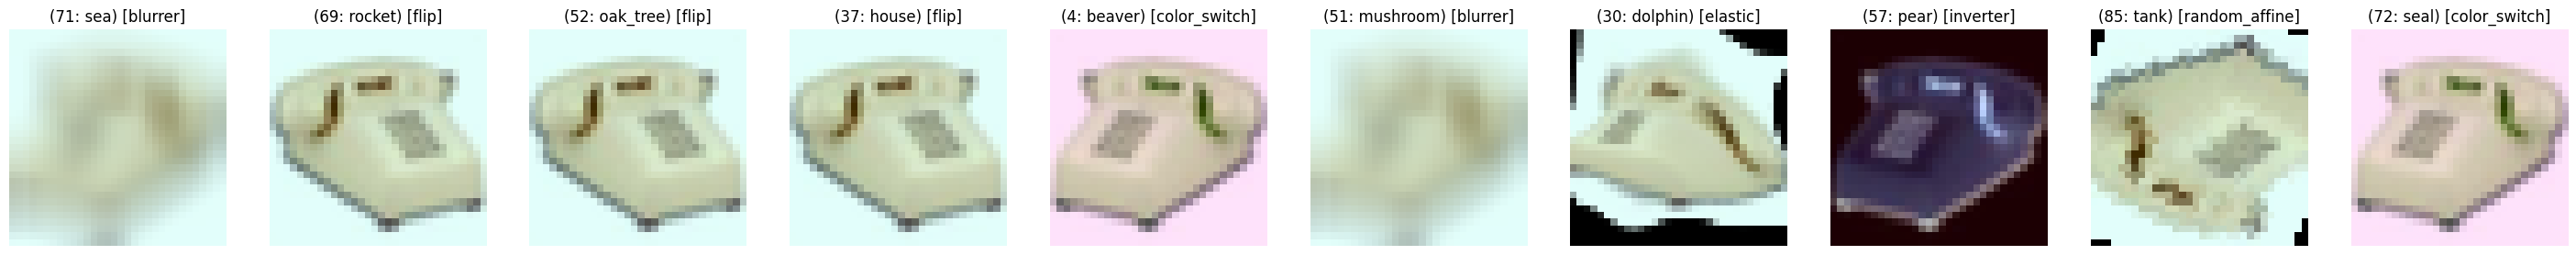

In [63]:
# victim_class = 86, attak target = 68

def mm_show_images_from_dataloader(dataloader, num_images=10): 
    plt.figure(figsize=(36, 12))
    iterator = iter(dataloader)
    for i in range(num_images):  
        image, label = next(iterator) 
        # Convert from tensor to numpy array and transpose to HWC format
        img = image.squeeze()
        img = img.permute(1, 2, 0).numpy()
        # print(f"img: {img}")
        # Plot the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels for clarity
        plt.title(f"({mm_targets[i]}: {cifar100_labels[mm_targets[i]]}) [{mm_transforms[i]}]")
    plt.show()
mm_show_images_from_dataloader(mm_loader, 10)

In [64]:
# M^2
wrapped_mm_aux_dataset = DataSetWrapper(CollectedDataset(mm_loader))

# Update the flipped_scores_name and flipped_score_save_dir dynamically
aux_mm_scores_name = "aux_mm_scores"
aux_mm_scores = compute_influences(wrapped_train_dataset, wrapped_mm_aux_dataset, aux_mm_scores_name)

Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]

Computing pairwise scores (training gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]
Computing pairwise scores (query gradient) [0/1]   0%|           [time left: ?, time spent: 00:00]
Computing pairwise scores (training gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:02]
Computing pairwise scores (query gradient) [1/1] 100%|██████████ [time left: 00:00, time spent: 00:03]
Computing pairwise scores (training gradient) [25/25] 100%|██████████ [time left: 00:00, time spent: 00:51]
Computing pairwise scores (training gradient) [25/25] 100%|██████████ [time left: 00:00, time spent: 00:51]
Computing pairwise scores (training gradient) [25/25] 100%|██████████ [time left: 00:00, time spent: 00:51]
Computing pairwise scores (training gradient) [25/25] 100%|██████████ [time left: 00:00, time spent: 00:51]
Computing pairwise scores (training gradient) [25/25] 100%|██████████ [time left: 00:00, time spent: 00:51]
Computing pairwise scores (training gradient) [25/

In [65]:
aux_mm_scores_save_dir = f'/xxx/open_source/smooth_trigger/{exp}/scores/MM_aux_{n_boosting}_scores.npy'

# Save the scores
aux_mm_scores_ts = aux_mm_scores['all_modules']
np.save(aux_mm_scores_save_dir, aux_mm_scores_ts)

In [66]:
aux_mm_scores_save_dir = f'/xxx/open_source/smooth_trigger/{exp}/scores/MM_aux_{n_boosting}_scores.npy'
# Load the saved scores (optional if you need to use them later in the loop)
aux_mm_scores_ts = np.load(aux_mm_scores_save_dir)
# Process the scores if necessary
aux_mm_scores_matrix = aux_mm_scores_ts.squeeze()
aux_mm_scores_matrix.shape

(50, 50000)

In [67]:
def get_preds(model, dataloader):
    preds=[]
    model.eval()  # Set the model to evaluation mode
    # Disable gradient calculations
    with torch.inference_mode():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            # Get model predictions
            outputs = victim_model(images)
            _, predicted = torch.max(outputs.data, 1)
            preds.append(predicted.item())
            # print(f"labels: {labels}")
            # print(f"predicted: {predicted}")
        return preds

In [68]:
# also, whether the modified img's prediction change is an interesting question about the detect mechanism
preds_original=get_preds(victim_model, deletion_loader)
# preds_modified=get_preds(victim_model, flipped_loader)
# preds_modified=get_preds(victim_model, clean_ver_deletion_loader)
preds_modified=get_preds(victim_model, mm_loader)

print(f"preds_original: {preds_original}")
print(f"preds_modified: {preds_modified}") 

preds_original: [68]
preds_modified: [23, 68, 68, 68, 68, 23, 61, 68, 61, 68, 23, 84, 68, 68, 68, 68, 61, 68, 68, 68, 68, 68, 68, 25, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 61, 68, 68, 68, 68, 68, 68, 68, 68, 68, 23, 68]


fix the setting, using n_boosting = 50

In [69]:
old_scores_matrix = old_scores_matrix.numpy()
old_scores_matrix.shape

(1, 50000)

In [85]:
######################## 
th = -40               # <--- FIX!!!!
n_tolerate = 0 # 1
########################

all_indices = np.arange(0, 50000).tolist()
# Step 1: Concatenate the matrices into a single matrix with 10 rows
boosted_change_scores_matrix = aux_mm_scores_matrix - old_scores_matrix
boosted_change_scores_matrix.shape

(50, 50000)

In [86]:
len(manip_idx_arr)

125

In [87]:
# Step 2: Map the values into boolean (True if negative)
boolean_matrix = boosted_change_scores_matrix[:, all_indices] < th    # 0, another th?

# Step 3: Reduce the matrix into one row by summing all the rows (count of True values per column)
negative_counts_per_column = boolean_matrix.sum(axis=0)

# Optionally, print the result
print("Count of negative values in each column:", negative_counts_per_column)

detected = torch.tensor(negative_counts_per_column >= (boosted_change_scores_matrix.shape[0]-n_tolerate))

temp_index = np.where(detected)[0]
all_indices_np = np.array(all_indices)
detected_idx = all_indices_np[temp_index]

# print(f"detected_idx: {detected_idx}")
# How many true positives hit:
set1 = set(detected_idx.tolist())
set2 = set(manip_idx_arr.tolist())

common_elements = set1.intersection(set2)
common_tensor = torch.tensor(list(common_elements))

print(f" The algorithm returns {torch.sum(detected)} poisons...\n")
print(f" among them {len(common_tensor)} are true poisons (there're 125 poisons in total -> [{(len(common_tensor)/1.25):.2f}%] detected) \n\n their indices: {common_tensor.tolist()}\n")
print(f" the other {torch.sum(detected) - len(common_tensor)} are actually cleans...")

Count of negative values in each column: [ 3  0 14 ... 49  1  3]
 The algorithm returns 4364 poisons...

 among them 125 are true poisons (there're 125 poisons in total -> [100.00%] detected) 

 their indices: [46084, 41993, 5645, 22033, 32789, 25115, 40492, 30780, 25661, 5698, 46659, 19017, 2636, 43084, 44113, 46169, 14938, 35424, 16995, 10354, 9336, 40573, 30343, 5767, 5262, 28302, 30865, 14994, 46740, 4246, 31896, 668, 43676, 1186, 16561, 7345, 18105, 21691, 18107, 27837, 26304, 19138, 198, 25287, 17103, 39123, 22229, 39129, 39130, 10467, 47855, 44272, 34543, 45298, 44794, 45306, 17665, 48900, 17668, 11534, 16656, 12561, 39699, 19219, 23829, 35608, 26907, 11035, 41756, 46375, 22317, 28461, 14129, 21814, 21816, 15672, 33083, 1342, 29507, 44356, 2378, 12635, 32605, 38753, 23394, 43874, 47969, 24935, 34153, 6002, 43891, 46967, 30586, 23418, 14208, 32129, 3971, 18310, 3978, 34195, 36755, 10660, 35748, 49574, 13228, 43948, 27070, 6078, 29633, 47045, 19397, 23496, 11723, 1485, 22993, 1583

In [ ]:
detected_idx_ts = torch.tensor(detected_idx)
print(len(detected_idx_ts))
# save the detected indices
detected_save_dir = f'/xxx/open_source/smooth_trigger/{exp}/detected/aux_MM_{n_boosting}_detected_indices.npy'
print(f"detected_save_dir: {detected_save_dir}")
# np.save(detected_save_dir, common_tensor)
np.save(detected_save_dir, detected_idx_ts)
# Well Done